# 1. Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 2. Abrimos el Dataset


In [2]:
sharks = pd.read_csv('./data/attacks.csv', encoding = 'ISO - 8859-1')
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


#### El dataset 'attacks' tiene 25723 filas y 24 columnas

In [3]:
sharks.shape

(25723, 24)

# 3. Hipotesis: ¿en qué país han atacado más tiburones?
Analizaré los datos teniendo en cuenta:
  
    - Sexo
    - Edad 

In [4]:
#Muestro las columnas

In [5]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
# Elimino las columnas que no me interesan, para ello antes tengo que quitar los espacios, sino hay varias columnas que no me las detecta.

In [7]:
sharks.columns = sharks.columns.str.rstrip()
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
sharks = sharks.drop(['Time','pdf','href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Investigator or Source', 'Type', 'Date', 'Case Number', 'Species', 'Area', 'Location'], axis = 1 )

In [9]:
sharks.shape

(25723, 8)

In [10]:
sharks.head()

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,USA,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,2018.0,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.0,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N
4,2018.0,MEXICO,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [11]:
#Compruebo los datos nulos y los elimino.

In [12]:
sharks.isnull().sum().sort_values(ascending=False)

Age            22252
Sex            19986
Activity       19965
Fatal (Y/N)    19960
Name           19631
Country        19471
Injury         19449
Year           19423
dtype: int64

In [13]:
sharks.dropna()

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,USA,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,2018.0,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
6,2018.0,BRAZIL,Swimming,Jose Ernesto da Silva,M,18,FATAL,Y
7,2018.0,USA,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...
6243,0.0,IRAQ,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N
6254,0.0,CUBA,"Shark fishing, knocked overboard",Sandrillio,M,50,"FATAL, hip bitten PROVOKED INCIDENT",Y
6265,0.0,IRAQ,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y
6276,0.0,BELIZE,Standing,a servant,M,16,FATAL,Y


In [14]:
#Voy a trabajar con una dataset de 3091 filas y 8 columnas

In [15]:
#Compruebo los Países y confirmo los que tienen más ataques.

In [16]:
sharks['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [17]:
sharks['Country'].value_counts()
#Hay 212 países.

USA                             2229
AUSTRALIA                       1338
SOUTH AFRICA                     579
PAPUA NEW GUINEA                 134
NEW ZEALAND                      128
                                ... 
EQUATORIAL GUINEA / CAMEROON       1
BAY OF BENGAL                      1
Between PORTUGAL & INDIA           1
PERU                               1
Coast of AFRICA                    1
Name: Country, Length: 212, dtype: int64

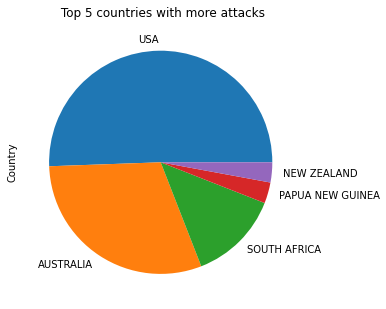

In [18]:
#Creo un gráfico y muestro el top 5.
top5 = sharks["Country"].value_counts().nlargest(5).plot.pie(figsize = (5,10), title = " Top 5 countries with more attacks")
top5.figure.savefig('output/top5countries.png')

In [19]:
#Ahora que ya sé que USA es el país con más ataques agrupo los datos por el país y lo muestro.
sharks.groupby(['Country']).get_group('USA')

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,USA,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,2018.0,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
7,2018.0,USA,Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N
8,2018.0,USA,Walking,Cody High,M,15,Lower left leg bitten,N
...,...,...,...,...,...,...,...,...
6249,0.0,USA,Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,N
6283,0.0,USA,Fishing,James Kelley,M,NaN,2-inch lacerations,N
6288,0.0,USA,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N
6292,0.0,USA,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N


## El país con más ataques es USA. 

In [20]:
#Creo un nuevo dataset con el que voy a trabajar.
sharks_usa = sharks[(sharks["Country"]== "USA")]
sharks_usa.sample(10)

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
804,2012.0,USA,Surfing,Joey Coppola,M,21,Minor lacerations to foot,N
3250,1974.0,USA,Hookah diving for abalone,Jon Holcomb,M,29,Major injuries,N
4663,1943.0,USA,The Cuban freighter Libertad was torpedoed and...,Julio C. de Cabarrocas,M,NaN,"Of the 18 crew who survived the sinking, 10 we...",Y
6027,1850.0,USA,Swimming after his hat,a sailor,M,NaN,FATAL,Y
1340,2007.0,USA,Surfing,Joseph Coursey,M,54,Left hand bitten,N
336,2015.0,USA,Wading,Jill Kruse,F,28,Injury to right ankle/calf & hand,N
1486,2006.0,USA,Surfing,T. Davis Bunn,M,54,Feet bitten,N
2579,1991.0,USA,Surfing,Cliff Turner,M,21,Right foot & ankle lacerated,N
420,2015.0,USA,Wading,Dakota Hatfield,F,19,Minor lacerations to dorsum of right foot,N
2177,1998.0,USA,Surfing,Michael Rinto,M,13,Calf bitten,N


In [21]:
#Cuento los duplicados los elimino.
sharks_usa.duplicated().value_counts()

False    2227
True        2
dtype: int64

In [22]:
sharks_usa.drop_duplicates()
sharks.head()

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,USA,Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,USA,Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,2018.0,USA,Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.0,AUSTRALIA,Surfing,male,M,NaN,Minor injury to lower leg,N
4,2018.0,MEXICO,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


## Analizo la  columna Sex:
Reemplazo F-Female y M-Male.

In [23]:
sharks_usa['Sex'].replace('F','Female', inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
sharks_usa['Sex'].replace('M','Male', inplace=True)

In [25]:
sharks_usa

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,2018.0,USA,Paddling,Julie Wolfe,Female,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.0,USA,Standing,Adyson McNeely,Female,11,Minor injury to left thigh,N
2,2018.0,USA,Surfing,John Denges,Male,48,Injury to left lower leg from surfboard skeg,N
7,2018.0,USA,Fishing,male,Male,52,Minor injury to foot. PROVOKED INCIDENT,N
8,2018.0,USA,Walking,Cody High,Male,15,Lower left leg bitten,N
...,...,...,...,...,...,...,...,...
6249,0.0,USA,Standing,Horton Chase,Male,NaN,Abrasions & bruises hip to ankle,N
6283,0.0,USA,Fishing,James Kelley,Male,NaN,2-inch lacerations,N
6288,0.0,USA,Swimming,"""youthful male""",Male,NaN,"""Lost leg""",N
6292,0.0,USA,NaN,"A ""chiefess""",Female,NaN,Ankle bitten,N


In [26]:
sharks_usa['Sex'].value_counts()

Male      1792
Female     337
M            1
lli          1
Name: Sex, dtype: int64

### Me encuentro que hay dos valores que no son Male ni Female y los analizo

In [27]:
sharks_usa.loc[sharks_usa['Sex'] == 'M ']

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
563,2014.0,USA,Swimming,male,M,42,Laceration & puncture wounds to right foot,N


In [28]:
sharks_usa.loc[563]

Year                                               2014.0
Country                                               USA
Activity                                         Swimming
Name                                                 male
Sex                                                    M 
Age                                                    42
Injury         Laceration & puncture wounds to right foot
Fatal (Y/N)                                             N
Name: 563, dtype: object

In [29]:
sharks_usa['Sex'].replace('M ','Male', inplace = True)

/usr/local/lib/python3.9/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
sharks_usa['Sex'].value_counts()

Male      1793
Female     337
lli          1
Name: Sex, dtype: int64

In [31]:
sharks_usa.loc[sharks_usa['Sex'] == 'lli']

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
1624,2004.0,USA,Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N


In [32]:
sharks_usa.loc[1624]

Year                                       2004.0
Country                                       USA
Activity                                  Surfing
Name                                   Brian Kang
Sex                                           lli
Age                                            38
Injury         Lacerations to hand, knee & thigh 
Fatal (Y/N)                                     N
Name: 1624, dtype: object

In [33]:
sharks_usa['Sex'].replace('lli','Male', inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [34]:
sharks_usa['Sex'].value_counts()

Male      1794
Female     337
Name: Sex, dtype: int64

In [35]:
sharks_usa['Sex'].value_counts().sum()

2131

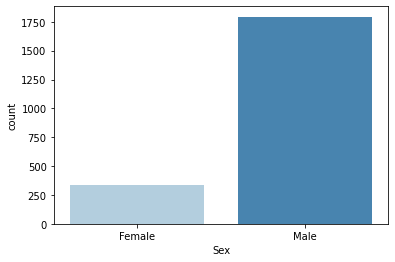

In [36]:
# Representación gráfica Female vs Male.
gender = sns.countplot(x= sharks_usa.Sex, palette="Blues")
gender.figure.savefig('output/gender.png')

In [37]:
#Calculo el porcentaje y para ello creo una función.
def porcentaje(i,j):
    male = round((i * 100)/(i+j))
    female = round((j * 100)/(i+j))
    return (male, female)
porcentaje(1794,337)

(84, 16)

# El 84% son Hombres y el 16% son Mujeres.

### Observo que en la coluna de los años, hay diferentes formas expresadas y quiero crear a través de un patrón una cifra de dos valores.

In [38]:
sharks_usa['Age'].value_counts()

16      68
15      67
17      65
19      61
18      59
        ..
 43      1
 28      1
77       1
         1
60's     1
Name: Age, Length: 100, dtype: int64

In [39]:
sharks_usa['Age'].unique()

array(['57', '11', '48', '52', '15', '12', '10', '29', '25', '54', '35',
       '14', nan, '17', '60', '40', '33', '28', '18', '3', '69', '13',
       '34', '8', '50', '46', '16', '19', '20', '21', '51', '58', '22',
       'Teen', '47', '41', '42', '36', '66', '32', '43', '60s', '9', '37',
       '49', '61', '59', '6', '27', '64', '23', '26', '71', '44', '31',
       '38', '39', '68', '30', '65', '63', '70', '53', '7', '20s', '45',
       '50s', 'teen', '56', '24', '55', '30s', '5', '86', '12 or 13',
       '62', 'Teens', '8 or 10', '\xa0 ', '6½', 'mid-30s', '73',
       '23 & 20', '7      &    31', ' 28', "60's", '87', '67', '77',
       'Elderly', 'mid-20s', 'Ca. 33', '75', '21 or 26', 'adult',
       '9 & 12', '37, 67, 35, 27,  ? & 27', ' 43', '?    &   14',
       '10 or 12', 'young'], dtype=object)

In [40]:
!pip3 install regex

In [41]:
#pattern = (\d{2}) -- findall (patrón, string)
#Quiero escoger sólo las edades de dos valores.
import re
import statistics
def ages(i):
    try:
        pattern = r'(\d{2})'
        busca = re.findall(pattern, i)
        return int(busca[0])

    except:
        return np.nan

In [42]:
ages('25 or 30')

25

In [43]:
#Creo una nueva columna y aplico la función
sharks_usa['Ages'] = sharks_usa['Age'].apply(ages)

<ipython-input-43-27d674de7739>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa['Ages'] = sharks_usa['Age'].apply(ages)


In [44]:
#Muestro los valores únicos y tengo nan; los elimino.
sharks_usa['Ages'].unique()

array([57., 11., 48., 52., 15., 12., 10., 29., 25., 54., 35., 14., nan,
       17., 60., 40., 33., 28., 18., 69., 13., 34., 50., 46., 16., 19.,
       20., 21., 51., 58., 22., 47., 41., 42., 36., 66., 32., 43., 37.,
       49., 61., 59., 27., 64., 23., 26., 71., 44., 31., 38., 39., 68.,
       30., 65., 63., 70., 53., 45., 56., 24., 55., 86., 62., 73., 87.,
       67., 77., 75.])

In [45]:
sharks_usa.dropna(subset=["Ages"],inplace=True)

<ipython-input-45-7c0da17f5bcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa.dropna(subset=["Ages"],inplace=True)


In [46]:
sharks_usa['Ages'].unique()

array([57., 11., 48., 52., 15., 12., 10., 29., 25., 54., 35., 14., 17.,
       60., 40., 33., 28., 18., 69., 13., 34., 50., 46., 16., 19., 20.,
       21., 51., 58., 22., 47., 41., 42., 36., 66., 32., 43., 37., 49.,
       61., 59., 27., 64., 23., 26., 71., 44., 31., 38., 39., 68., 30.,
       65., 63., 70., 53., 45., 56., 24., 55., 86., 62., 73., 87., 67.,
       77., 75.])

In [47]:
sharks_usa['Ages'].isnull().sum()

0

In [48]:
sharks_usa.head()

,Year,Country,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Ages
0,2018.0,USA,Paddling,Julie Wolfe,Female,57,"No injury to occupant, outrigger canoe and pad...",N,57.0
1,2018.0,USA,Standing,Adyson McNeely,Female,11,Minor injury to left thigh,N,11.0
2,2018.0,USA,Surfing,John Denges,Male,48,Injury to left lower leg from surfboard skeg,N,48.0
7,2018.0,USA,Fishing,male,Male,52,Minor injury to foot. PROVOKED INCIDENT,N,52.0
8,2018.0,USA,Walking,Cody High,Male,15,Lower left leg bitten,N,15.0


In [49]:
#Elimino la columna Age y me quedo con la de Ages.
sharks_usa = sharks_usa.drop(['Age'], axis = 1 )
sharks_usa.head()

,Year,Country,Activity,Name,Sex,Injury,Fatal (Y/N),Ages
0,2018.0,USA,Paddling,Julie Wolfe,Female,"No injury to occupant, outrigger canoe and pad...",N,57.0
1,2018.0,USA,Standing,Adyson McNeely,Female,Minor injury to left thigh,N,11.0
2,2018.0,USA,Surfing,John Denges,Male,Injury to left lower leg from surfboard skeg,N,48.0
7,2018.0,USA,Fishing,male,Male,Minor injury to foot. PROVOKED INCIDENT,N,52.0
8,2018.0,USA,Walking,Cody High,Male,Lower left leg bitten,N,15.0


In [50]:
#Encuentro que hay 67 valores únicos.
len(sharks_usa['Ages'].unique())

67

<AxesSubplot:xlabel='Sex', ylabel='count'>

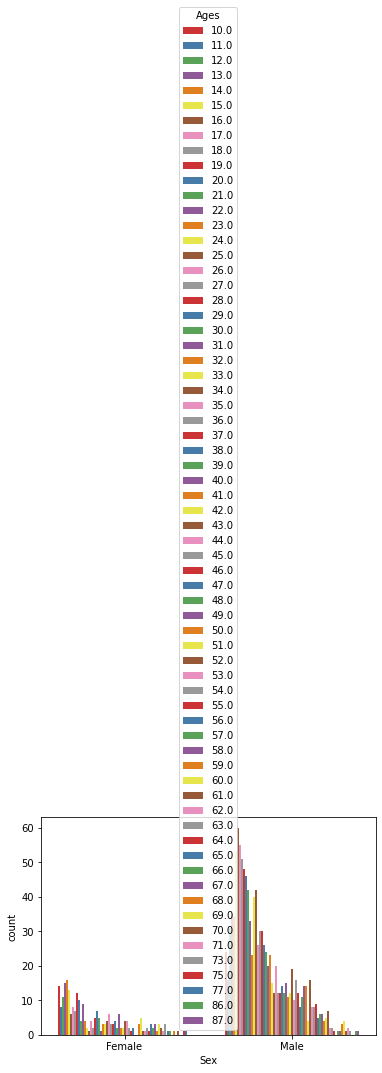

In [51]:
# A la hora de representarlos en un gráfico, no queda claro.
sns.countplot(x= sharks_usa.Sex, hue=sharks_usa.Ages, palette="Set1")

<AxesSubplot:xlabel='Ages', ylabel='count'>

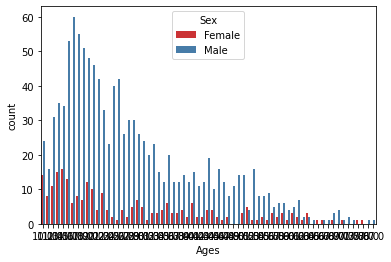

In [52]:
#Aquí tampoco.
sns.countplot(x= sharks_usa.Ages, hue=sharks_usa.Sex, palette="Set1")

In [53]:
#Por eso decido crear una nueva columna con rango de edades.
sharks_usa['AgeRanges'] = pd.cut(sharks_usa.Ages, bins=[0, 10, 20, 30, 40, 50, 60, 70, 100])
sharks_usa.head()

,Year,Country,Activity,Name,Sex,Injury,Fatal (Y/N),Ages,AgeRanges
0,2018.0,USA,Paddling,Julie Wolfe,Female,"No injury to occupant, outrigger canoe and pad...",N,57.0,"(50, 60]"
1,2018.0,USA,Standing,Adyson McNeely,Female,Minor injury to left thigh,N,11.0,"(10, 20]"
2,2018.0,USA,Surfing,John Denges,Male,Injury to left lower leg from surfboard skeg,N,48.0,"(40, 50]"
7,2018.0,USA,Fishing,male,Male,Minor injury to foot. PROVOKED INCIDENT,N,52.0,"(50, 60]"
8,2018.0,USA,Walking,Cody High,Male,Lower left leg bitten,N,15.0,"(10, 20]"


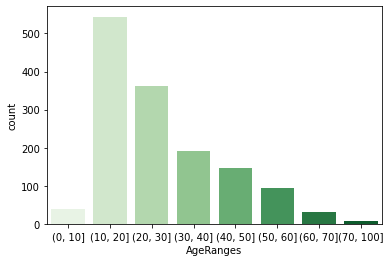

In [54]:
#El rango de edad con más ataques es de 10-20 años.
edades = sns.countplot(x=sharks_usa.AgeRanges, palette="Greens")
edades.figure.savefig('output/edades.png')

In [55]:
#La edad media de los atacados es:
round(sharks_usa['Ages'].mean())

28

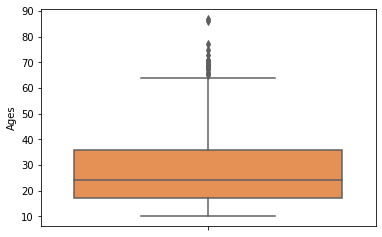

In [56]:
media = sns.boxplot(y="Ages", data=sharks_usa, palette ="Oranges")
media.figure.savefig('output/media.png')

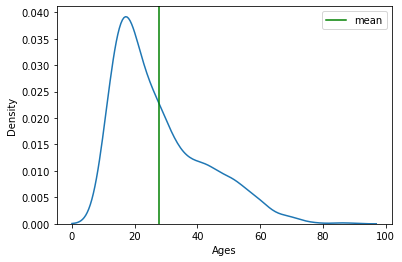

In [57]:
media2 = sns.kdeplot(x=sharks_usa.Ages)
media2.axvline(x=sharks_usa.Ages.mean(), c="green", label="mean")
plt.legend()
media2.figure.savefig('output/media2.png')

In [58]:
#La persona con más edad atacada:
sharks_usa['Ages'].max()

87.0

In [59]:
sharks_usa.loc[sharks_usa['Ages'] == 87]

,Year,Country,Activity,Name,Sex,Injury,Fatal (Y/N),Ages,AgeRanges
2846,1985.0,USA,Wading,Joseph Friedlander,Male,Right calf bitten & less serious injury to lef...,N,87.0,"(70, 100]"


#### El Señor Joseph Friedlander fue atacado en 1985, no fue fatal (mordida en la pantorrilla derecha y lesión menos grave en el pie izquierdo)

In [60]:
#Las activifades con más ataques son:
sharks_usa['Activity'].value_counts()

Surfing                          464
Swimming                         198
Wading                            79
Standing                          41
Fishing                           40
                                ... 
Body surfing & treading water      1
Walking in shallows                1
Body surfing / treading water      1
Crabbing (spearing crabs)          1
Surfing, collided with shark       1
Name: Activity, Length: 293, dtype: int64

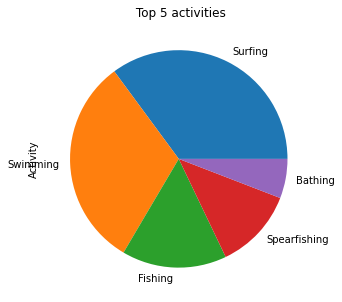

In [61]:
Actv = sharks["Activity"].value_counts().nlargest(5).plot.pie(figsize = (5,5), title = " Top 5 activities")

In [62]:
sharks_usa['Activity'].unique

<bound method Series.unique of 0                                                Paddling
1                                                Standing
2                                                 Surfing
7                                                 Fishing
8                                                 Walking
                              ...                        
6036                                             Swimming
6061                                             Swimming
6089    Fishing from dory, shark upset boat & he fell ...
6200                                        Shark tagging
6226    Skin diving. Grabbed shark's tail; shark turne...
Name: Activity, Length: 1412, dtype: object>

In [63]:
#Las 5 actividades con más ataques son: Surfing, Swimming, Wading, Standing y Fishing.
#Creo una función para agrupar las actividades que no son esas 5 en "Other".

def activity(x):
    if x == "Surfing": 
        return "Surfing"
    elif x == "Swimming": 
        return "Swimming"
    elif x == "Wading": 
        return "Wading"
    elif x == "Standing": 
        return "Standing"
    elif x == "Fishing": 
        return "Fishing"
    else:
        return "Other"

activity("Surfing")


'Surfing'

In [64]:
activity("Lobstering")

'Other'

In [65]:
#Creo una nueva columna con los nuevos 6 valores.
sharks_usa['Action'] = sharks_usa['Activity'].apply(activity)
sharks_usa.head()

,Year,Country,Activity,Name,Sex,Injury,Fatal (Y/N),Ages,AgeRanges,Action
0,2018.0,USA,Paddling,Julie Wolfe,Female,"No injury to occupant, outrigger canoe and pad...",N,57.0,"(50, 60]",Other
1,2018.0,USA,Standing,Adyson McNeely,Female,Minor injury to left thigh,N,11.0,"(10, 20]",Standing
2,2018.0,USA,Surfing,John Denges,Male,Injury to left lower leg from surfboard skeg,N,48.0,"(40, 50]",Surfing
7,2018.0,USA,Fishing,male,Male,Minor injury to foot. PROVOKED INCIDENT,N,52.0,"(50, 60]",Fishing
8,2018.0,USA,Walking,Cody High,Male,Lower left leg bitten,N,15.0,"(10, 20]",Other


In [66]:
sharks_usa['Action'].value_counts()

Other       590
Surfing     464
Swimming    198
Wading       79
Standing     41
Fishing      40
Name: Action, dtype: int64

<AxesSubplot:xlabel='Action', ylabel='Count'>

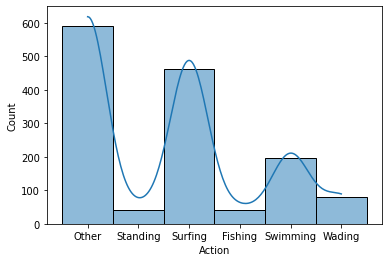

In [67]:
#A pesar de que la actividad de Surfing es la mayor, existen registros diferentes al top 5 que suman en total más.
sns.histplot(x=sharks_usa.Action, kde=True, palette = "Reds")

In [68]:
#Elimino la columna Activity y dejo la columna de Action.
sharks_usa = sharks_usa.drop(['Activity'], axis = 1 )
sharks_usa.sample(10)

,Year,Country,Name,Sex,Injury,Fatal (Y/N),Ages,AgeRanges,Action
188,2017.0,USA,male,Male,Minor injuries to foot,N,47.0,"(40, 50]",Wading
2660,1989.0,USA,Doug Nunnally,Male,FATAL,NaN,49.0,"(40, 50]",Other
2873,1984.0,USA,Larry Peebles,Male,"Disappeared, 1 mile from where Sandra Fletcher...",NaN,22.0,"(20, 30]",Swimming
1264,2008.0,USA,David Alger,Male,3-inch laceration to dorsal surface of left foot,N,18.0,"(10, 20]",Surfing
2979,1982.0,USA,Murray Branson,Male,Left arm bitten,N,20.0,"(10, 20]",Swimming
563,2014.0,USA,male,Male,Laceration & puncture wounds to right foot,N,42.0,"(40, 50]",Swimming
1481,2006.0,USA,Japanese female,Female,Laceration to leg,N,30.0,"(20, 30]",Other
4291,1955.0,USA,William Cashman,Male,Bites on legs & thighs,N,13.0,"(10, 20]",Wading
5176,1924.0,USA,Professor Winslow,Male,"FATAL, hand severed, both legs & arms bitten &...",Y,35.0,"(30, 40]",Other
2942,1983.0,USA,Jonathan Popper,Male,Right foot bitten,N,22.0,"(20, 30]",Surfing


In [69]:
#Analizo los datos de Fatal. 
sharks_usa['Fatal (Y/N)'].value_counts()

N          1246
Y            78
UNKNOWN       3
Name: Fatal (Y/N), dtype: int64

In [70]:
#Reemplazo N, No y Y, Yes.

In [71]:
sharks_usa['Fatal (Y/N)'].replace('N','No', inplace = True)

In [72]:
sharks_usa['Fatal (Y/N)'].replace('Y','Yes', inplace = True)

In [73]:
sharks_usa['Fatal (Y/N)'].value_counts()

No         1246
Yes          78
UNKNOWN       3
Name: Fatal (Y/N), dtype: int64

In [74]:
#Observo los Unknown y no puedo deducir si son Yes o No por falta de información.
sharks_usa.loc[sharks_usa['Fatal (Y/N)'] == 'UNKNOWN']

,Year,Country,Name,Sex,Injury,Fatal (Y/N),Ages,AgeRanges,Action
2648,1990.0,USA,male,Male,NaN,UNKNOWN,17.0,"(10, 20]",Surfing
3429,1969.0,USA,Steven Benham,Male,No details,UNKNOWN,22.0,"(20, 30]",Wading
4269,1956.0,USA,girl,Female,No details,UNKNOWN,14.0,"(10, 20]",Swimming


In [75]:
#Reemplazo UNKNOWN por Unknown para que los tres nombres tengan la misma forma.
sharks_usa['Fatal (Y/N)'].replace('UNKNOWN','Unknown', inplace = True)

In [76]:
sharks_usa['Fatal (Y/N)'].value_counts()

No         1246
Yes          78
Unknown       3
Name: Fatal (Y/N), dtype: int64

In [77]:
#intento importar la función de porcentaje creada pero dice que no existe..
from cleaning_func import porcentaje

ModuleNotFoundError: No module named 'cleaning_func'

In [78]:
sharks_usa.head()

,Year,Country,Name,Sex,Injury,Fatal (Y/N),Ages,AgeRanges,Action
0,2018.0,USA,Julie Wolfe,Female,"No injury to occupant, outrigger canoe and pad...",No,57.0,"(50, 60]",Other
1,2018.0,USA,Adyson McNeely,Female,Minor injury to left thigh,No,11.0,"(10, 20]",Standing
2,2018.0,USA,John Denges,Male,Injury to left lower leg from surfboard skeg,No,48.0,"(40, 50]",Surfing
7,2018.0,USA,male,Male,Minor injury to foot. PROVOKED INCIDENT,No,52.0,"(50, 60]",Fishing
8,2018.0,USA,Cody High,Male,Lower left leg bitten,No,15.0,"(10, 20]",Other


In [79]:
#Observo que dentro de Name hay valores que no son correctos.
sharks_usa['Name'].value_counts()

male                     91
female                   33
girl                      3
Kenny Burns               2
boy                       2
                         ..
Stephen Curtis Powell     1
Seth Mead                 1
Colette Wilson            1
Andy Schupe               1
Daniel Webb               1
Name: Name, Length: 1281, dtype: int64

In [80]:
#Defino una función para quedarme solo con nombres y el resto lo agrupo en NoName.
def name(x):
    if x == "male": 
        return "NoName"
    elif x == "female": 
        return "NoName"
    elif x == "girl": 
        return "NoName"
    else:
        return x

name("male")

'NoName'

In [81]:
name("Charles Cook")

'Charles Cook'

In [82]:
sharks_usa['Name & Last Name'] = sharks_usa['Name'].apply(name)

In [83]:
sharks_usa

,Year,Country,Name,Sex,Injury,Fatal (Y/N),Ages,AgeRanges,Action,Name & Last Name
0,2018.0,USA,Julie Wolfe,Female,"No injury to occupant, outrigger canoe and pad...",No,57.0,"(50, 60]",Other,Julie Wolfe
1,2018.0,USA,Adyson McNeely,Female,Minor injury to left thigh,No,11.0,"(10, 20]",Standing,Adyson McNeely
2,2018.0,USA,John Denges,Male,Injury to left lower leg from surfboard skeg,No,48.0,"(40, 50]",Surfing,John Denges
7,2018.0,USA,male,Male,Minor injury to foot. PROVOKED INCIDENT,No,52.0,"(50, 60]",Fishing,NoName
8,2018.0,USA,Cody High,Male,Lower left leg bitten,No,15.0,"(10, 20]",Other,Cody High
...,...,...,...,...,...,...,...,...,...,...
6036,1848.0,USA,William Haywood,Male,Left leg severely bitten,No,15.0,"(10, 20]",Swimming,William Haywood
6061,1842.0,USA,male,Male,Lacerations to leg,No,15.0,"(10, 20]",Swimming,NoName
6089,1830.0,USA,Joseph Blaney,Male,FATAL,Yes,52.0,"(50, 60]",Other,Joseph Blaney
6200,0.0,USA,Danniell Washington,Female,Severe abrasion to forearm from captive shark ...,No,21.0,"(20, 30]",Other,Danniell Washington


In [84]:
#Elimino la columna Name.
sharks_usa = sharks_usa.drop(['Name'], axis = 1 )
sharks_usa.head()

,Year,Country,Sex,Injury,Fatal (Y/N),Ages,AgeRanges,Action,Name & Last Name
0,2018.0,USA,Female,"No injury to occupant, outrigger canoe and pad...",No,57.0,"(50, 60]",Other,Julie Wolfe
1,2018.0,USA,Female,Minor injury to left thigh,No,11.0,"(10, 20]",Standing,Adyson McNeely
2,2018.0,USA,Male,Injury to left lower leg from surfboard skeg,No,48.0,"(40, 50]",Surfing,John Denges
7,2018.0,USA,Male,Minor injury to foot. PROVOKED INCIDENT,No,52.0,"(50, 60]",Fishing,NoName
8,2018.0,USA,Male,Lower left leg bitten,No,15.0,"(10, 20]",Other,Cody High


In [85]:
#Convierto los numeros float de Year y Ages a enteros.
def entero(x):
    return int(x)
print(entero(2018.0))

2018


In [86]:
#Aplico la función con un lambda
sharks_usa['Year'].apply(lambda x: int(x))

0       2018
1       2018
2       2018
7       2018
8       2018
        ... 
6036    1848
6061    1842
6089    1830
6200       0
6226       0
Name: Year, Length: 1412, dtype: int64

In [87]:
sharks_usa['Ages'].apply(lambda x: int(x))

0       57
1       11
2       48
7       52
8       15
        ..
6036    15
6061    15
6089    52
6200    21
6226    19
Name: Ages, Length: 1412, dtype: int64

In [88]:
sharks_usa

,Year,Country,Sex,Injury,Fatal (Y/N),Ages,AgeRanges,Action,Name & Last Name
0,2018.0,USA,Female,"No injury to occupant, outrigger canoe and pad...",No,57.0,"(50, 60]",Other,Julie Wolfe
1,2018.0,USA,Female,Minor injury to left thigh,No,11.0,"(10, 20]",Standing,Adyson McNeely
2,2018.0,USA,Male,Injury to left lower leg from surfboard skeg,No,48.0,"(40, 50]",Surfing,John Denges
7,2018.0,USA,Male,Minor injury to foot. PROVOKED INCIDENT,No,52.0,"(50, 60]",Fishing,NoName
8,2018.0,USA,Male,Lower left leg bitten,No,15.0,"(10, 20]",Other,Cody High
...,...,...,...,...,...,...,...,...,...
6036,1848.0,USA,Male,Left leg severely bitten,No,15.0,"(10, 20]",Swimming,William Haywood
6061,1842.0,USA,Male,Lacerations to leg,No,15.0,"(10, 20]",Swimming,NoName
6089,1830.0,USA,Male,FATAL,Yes,52.0,"(50, 60]",Other,Joseph Blaney
6200,0.0,USA,Female,Severe abrasion to forearm from captive shark ...,No,21.0,"(20, 30]",Other,Danniell Washington


In [89]:
#Reordeno las columnas
sharks_usa = sharks_usa[['Year','Country', 'Name & Last Name', 'Sex', 'Ages', 'AgeRanges', 'Action', 'Injury', 'Fatal (Y/N)']]

In [90]:
sharks_usa

,Year,Country,Name & Last Name,Sex,Ages,AgeRanges,Action,Injury,Fatal (Y/N)
0,2018.0,USA,Julie Wolfe,Female,57.0,"(50, 60]",Other,"No injury to occupant, outrigger canoe and pad...",No
1,2018.0,USA,Adyson McNeely,Female,11.0,"(10, 20]",Standing,Minor injury to left thigh,No
2,2018.0,USA,John Denges,Male,48.0,"(40, 50]",Surfing,Injury to left lower leg from surfboard skeg,No
7,2018.0,USA,NoName,Male,52.0,"(50, 60]",Fishing,Minor injury to foot. PROVOKED INCIDENT,No
8,2018.0,USA,Cody High,Male,15.0,"(10, 20]",Other,Lower left leg bitten,No
...,...,...,...,...,...,...,...,...,...
6036,1848.0,USA,William Haywood,Male,15.0,"(10, 20]",Swimming,Left leg severely bitten,No
6061,1842.0,USA,NoName,Male,15.0,"(10, 20]",Swimming,Lacerations to leg,No
6089,1830.0,USA,Joseph Blaney,Male,52.0,"(50, 60]",Other,FATAL,Yes
6200,0.0,USA,Danniell Washington,Female,21.0,"(20, 30]",Other,Severe abrasion to forearm from captive shark ...,No
